CEAS-08

# CEAS-08 Dataset Spam Detection Analysis

Ce notebook porte sur l'analyse du dataset CEAS 2008, un jeu de données classique dans la détection de spam par machine learning.  
L'objectif est de charger les données, les nettoyer, extraire des caractéristiques pertinentes, et entraîner ensuite des modèles pour différencier les emails spam des emails légitimes.

---

In [ ]:
# Import
import pandas as pd
from email.utils import parsedate_to_datetime
import Functions
# CEAS-08 Loading
df=pd.read_csv("/Users/user/Documents/Spam_Detection/Data/CEAS_08.csv")
# df columns : sender, receiver, date, subject, body, label, urls, etc.
# label spam (1) ou ham/non-spam (0).

In [2]:
df

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


# Aperçu des premières lignes

On affiche les premières lignes du dataset pour avoir une idée des colonnes et du type de données.  
On y voit les colonnes importantes comme : sender, receiver, date, subject, body, label, urls.

In [3]:
df.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [4]:
df['date_dt'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

In [5]:
print(df['date_dt'].dtype)

datetime64[ns, UTC]


In [6]:
df.isna().sum()

sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
date_dt      15
dtype: int64

In [7]:
df.shape[0]

39154

In [8]:
df=df.dropna()
df=df.drop_duplicates()

In [9]:
df.shape[0]

38654

# Conversion des dates et extraction de nouvelles variables temporelles

- La colonne 'date' contient des timestamps texte, on les convertit en objets datetime pour faciliter les opérations.  
- A partir de cette date, on dérive plusieurs colonnes qui permettront d'étudier des patterns temporels dans les spams (ex: jour de la semaine, heure, week-end).

In [10]:
df['year'] = df['date_dt'].dt.year
df['month'] = df['date_dt'].dt.month
df['day'] = df['date_dt'].dt.day
df['weekday'] = df['date_dt'].dt.weekday  
df['hour'] = df['date_dt'].dt.hour
df['is_weekend'] = df['date_dt'].dt.weekday >= 5

In [11]:
df

,sender,receiver,date,subject,body,label,urls,date_dt,year,month,day,weekday,hour,is_weekend
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,2008-08-05 23:31:02+00:00,2008,8,5,1,23,False
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,2008-08-05 23:31:03+00:00,2008,8,5,1,23,False
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,2008-08-06 08:28:00+00:00,2008,8,6,2,8,False
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,2008-08-05 23:31:20+00:00,2008,8,5,1,23,False
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,2008-08-05 23:31:21+00:00,2008,8,5,1,23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,2008-08-08 14:34:50+00:00,2008,8,8,4,14,False
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,2008-08-08 14:35:11+00:00,2008,8,8,4,14,False
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0,2008-08-08 14:00:43+00:00,2008,8,8,4,14,False
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0,2008-08-08 14:00:46+00:00,2008,8,8,4,14,False


# Analyse de la répartition des classes

On observe la proportion de spams vs emails légitimes (non-spam), ce qui est essentiel pour :
- Adapter les modèles (traitement du déséquilibre)
- Évaluer la difficulté du problème (imbalance impact)

<Axes: xlabel='label', ylabel='count'>

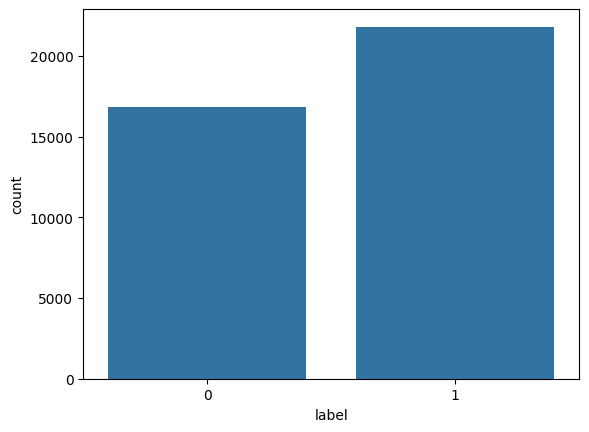

In [12]:
import seaborn as sns
sns.countplot(x='label',data = df)

0=Ham, 1=Spam

In [13]:
spam_body = df[df['label'] == 1]['body']
ham_body = df[df['label'] == 0]['body']
ham_text = ' '.join(ham_body)
spam_text = ' '.join(spam_body)

In [ ]:
len(spam_body)/len(df['label']) #Spam Pourcentage

0.5642883013400942

In [ ]:
len(ham_body)/len(df['label']) #Ham Pourcentage

0.43571169865990583

# Most Frequent Words Display

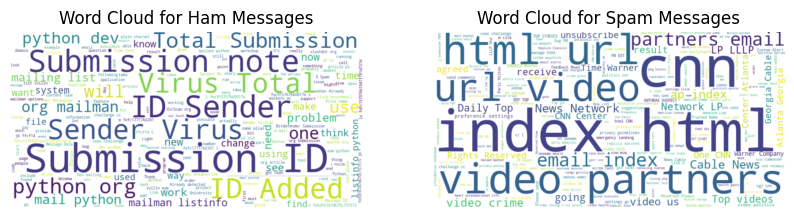

In [14]:
import Functions
Functions.wordcloudplot(ham_text,spam_text)

In [15]:
df.to_csv("/Users/user/Documents/Spam_Detection/Data/new_data_clear.csv", index=False)

# GEN AI based Data Augmentation

In [ ]:
"""from transformers import AutoModelForCausalLM, AutoTokenizer
import torch, json
from datetime import datetime, timezone, timedelta
import email.utils

token = "Votre Token"
# Choix du modèle gratuit
model_name = "TheBloke/Mistral-7B-Instruct-v0.2-AWQ"

# Chargement du modèle
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=token)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto", use_auth_token=token)

def generate_email(prompt, max_new_tokens=200):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(**inputs, max_new_tokens=max_new_tokens, temperature=0.8, do_sample=True)
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Exemple : génération d'un email HAM au format JSON
date_rfc2822 = email.utils.format_datetime(datetime.now(timezone(timedelta(hours=2))))
original_email = {
    "sender": "charles@example.com",
    "receiver": "paul@example.com",
    "date": date_rfc2822,
    "subject": "Réunion projet",
    "body": "Salut Paul, peux-tu confirmer ta présence demain à la réunion ?",
    "label": 0,
    "urls": 0
}

prompt = f"""
"""Génère 1 email réaliste au format JSON avec les champs suivants :
sender, receiver, date, subject, body, label, urls
- label = 0 pour ham
- date au format RFC 2822 (exemple : Tue, 05 Aug 2008 20:28:00 -1200)
- urls = nombre d'URLs présentes dans le body

Conserve le style et le contexte de l'email suivant :
{json.dumps(original_email, ensure_ascii=False)}

Réponds uniquement avec un JSON valide."""
"""

print(generate_email(prompt))"""

'\n\nprint(generate_email(prompt))'